¡Hola!

Me llamo Santiago y para mí es un gusto revisar tu proyecto el dia de hoy. Soy el reviewer que te estará acompañando y asesorando.

Cuando vea un error iré realizando un proceso gradual de darte información, de solo informarte la primera vez a darte más datos acerca del mismo en las siguientes iteraciones que te puedan ayudar a tener una visión más amplia de la situación. Haré comentarios, desde observaciones hasta sugerencias prácticas que involucran temas generales y buenas prácticas en el área si así lo deseas. También puedes comentarme preguntas o discusiones que puedas tener con plena tranquilidad.

Respecto a los comentarios que yo realize: **No los elimines, muevas o modifiques por favor**.

Encontrarás mis comentarios con los colores verde, amarillo y rojo, así:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien. Todo se realizó correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho aunque hay algunas sugerencias que te pueden ser útiles
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Requiere acciones o correciones, esta parte requiere tomar correciones debido a que hay algo que puede no funcionar como lo esperamos.
</div>

Si deseas comentarme algo, puedes hacerlo sin problema usando el siguiente formato:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    
Preguntas, discusiones o solo comentarios.
</div>

# Proyecto de minería para Zyfra

## Objetivo

Preparar un prototipo de un modelo de machine learning para Zyfra. Esta empresa desarrolla soluciones de eficiencia para la industria de la minería.

El modelo debe ser capaz de predecir la cantidad de oro extraído del mineral de oro, para lo cual se tienen datos sobre la extracción y purificación. El modelo debe ayudar a optimizar la producción y a eliminar los parámetros no rentables

## Descripción del proceso tecnológico:

Como punto de partida para el desarrollo de este proyecto se va a explicar el proceso que tiene que pasar el mineral. El mineral extraído se somete a un tratamiento primario para obtener la mezcla de minera, o alimentación de rougher, que es la materia prima utilizada para la flotación (proceso rougher). Despues de la flotación el miteral se somete a un proceso de purificación de dos etapas.

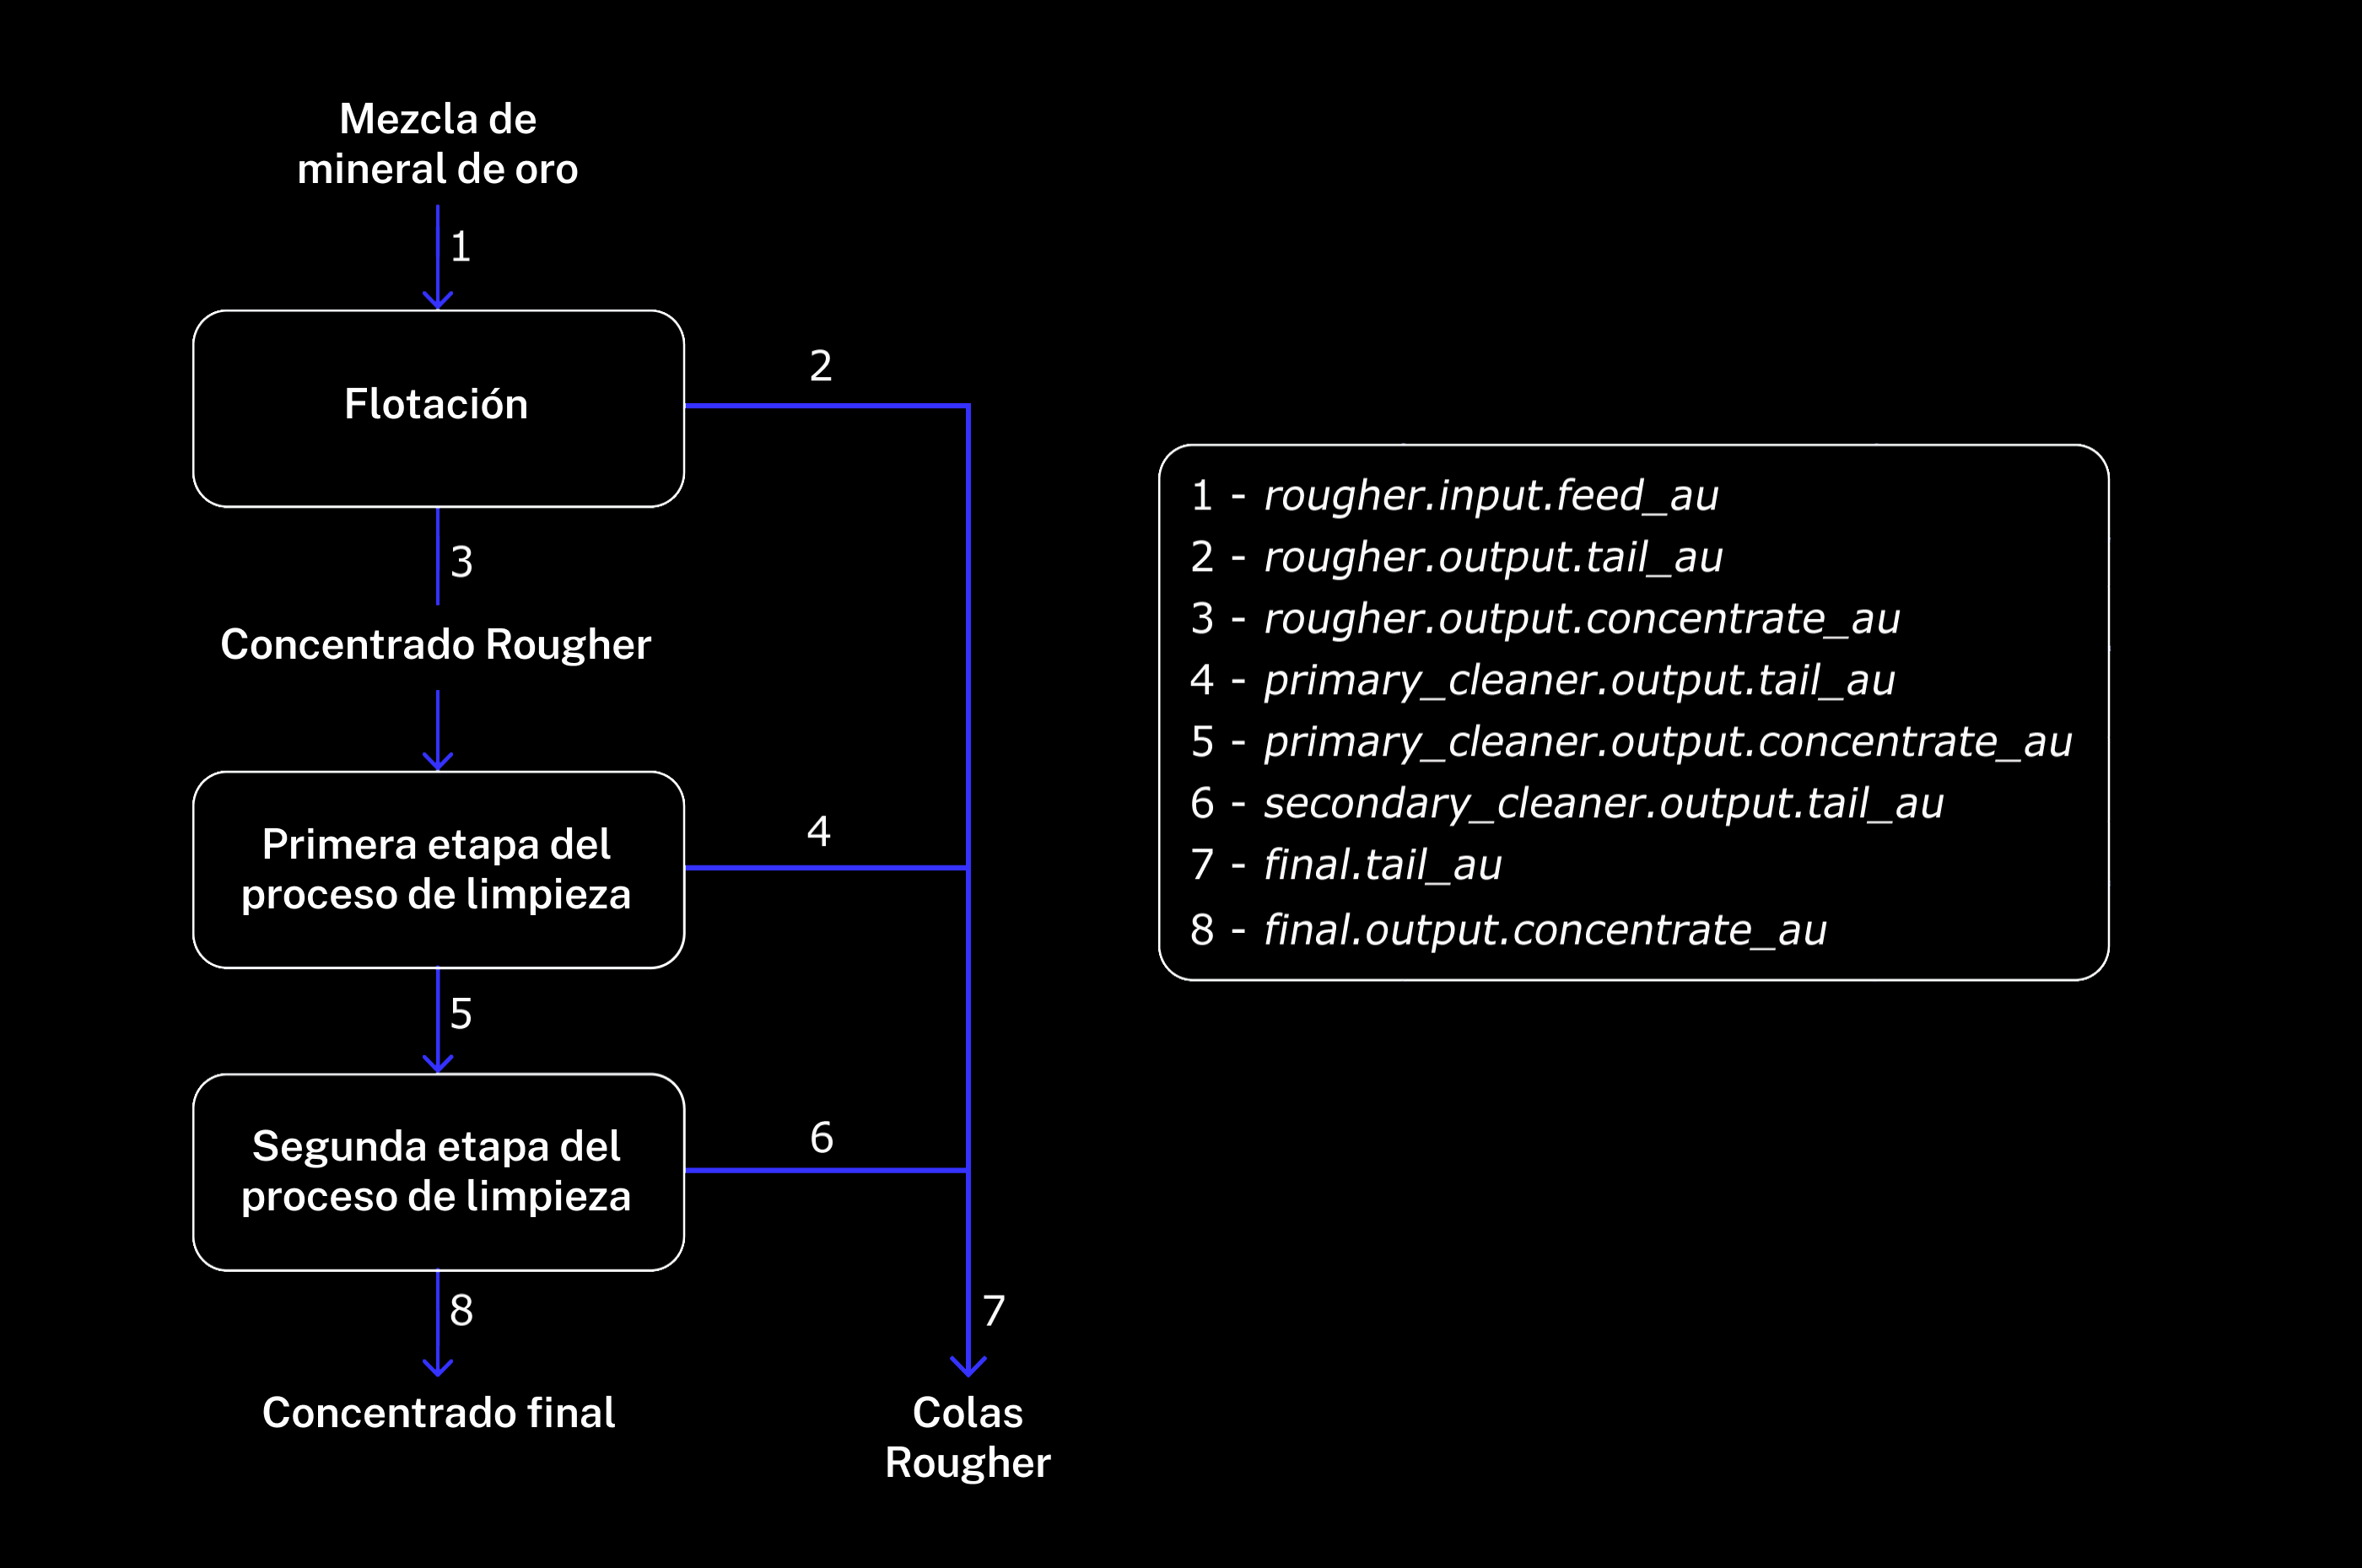

### Flotación

La mezcla de mineral  de oro se introduce en las plantas de flotación para obtener un concentrado de oro rougher y colas rougher(residuos de producto con baja concentración de metales valiosos)

La estabilidad de este proceso se ve afectada por la volatilidad y el estado físico-químico desfavorable de la pulpa de flotación(mezcla de partículas sólidas y líquidas

### Purificación

El concentrado rougher se somete a dos etapas de purificación. Luego de esto, se tiene el concetrado final y las nuevas colas.


## Descripcíon de datos

A continuación se indican cuales son los datos que se encuentra en la base de datos entregada:

**Proceso tecnológico**

- `Rougher feed`: materia prima
- `Rougher additions`: reactivos de flotación; xantato(promotor de flotación), sulfato(sulfuro de sodio), depresante(silicato de sodio)
- `Rougher process`: flotación
- `Rougher tails`: residuos de producto
- `Cleaner process`: purificación
- `Rougher Au`: concentrado de oro rougher
- `Final Au`: concentrado de oro final

**Parámetros de las etapas**
- `air amount`: volumen de aire
- `fluid levels`
- `feed size`: tamaño de las partículas de la alimentación
- `feed rate`:

### Denominación de las características:

Las características se denominan de la siguiente forma: 
    
    [stage].[parameter_type].[parameter_name]

Ejemplo: rougher.input.feed_ag

Valores posibles para [stage]:

- `rougher`: flotación
- `primary_cleaner`: purificación primaria
- `secondary_cleaner`: purificación secundaria
- `final`: características finales

Valores posibles para [parameter_type]:

- `input`: parámetros de la materia prima
- `output`: parámetros del producto
- `state`: parámetros que caracterizan el estado actual de la etapa
- `calculation`: características de cálculo


### Calculo de la recuperación:

Es necesario simular el proceso de recuperación del oro del mineral de oro, par alo cual se utilizará la siguiente fórmula:

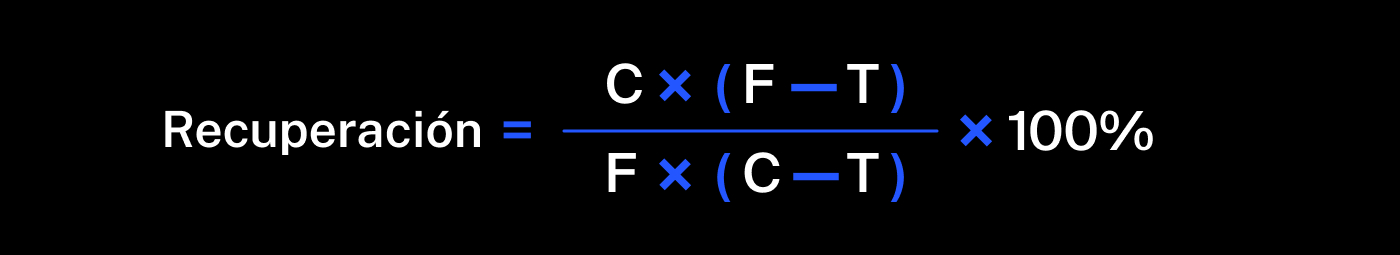

donde:

- `C`: proporcion de oro en el concentrado justo despues de la flotación, "rougher.output.concentrate_au" (para saber la recuperación del concentrado rougher)/despues de la purificación, "final.output.concentrate_au" (para saber la recuperación del concentrado final)
- `F`: proporcion de oro en la alimentación antes de la flotación "rougher.input.feed_au"(para saber la recuperación del concentrado rougher)/ "rougher.input.feed_au" (es la misma para saber la recuperación del conentrado final)
- `T`: proporcion de oro en las colas rougher justo despues de la flotación, "rougher.output.tail_au" (para saber la recuperación del concentrado rougher)/Cola final, "final.output.tail_au (para saber la recuperación del concentrado final)

[Hay errores en la formula entregada]

### Métricas de evaluación

Para resolver el problema se necesita de la métrica denominada sMAPEp, o error medio absoluto porcentual simétrico, el cual se expresa en valores relativos en lugar de absolutos. Se calcula con la siguiente fórmula:

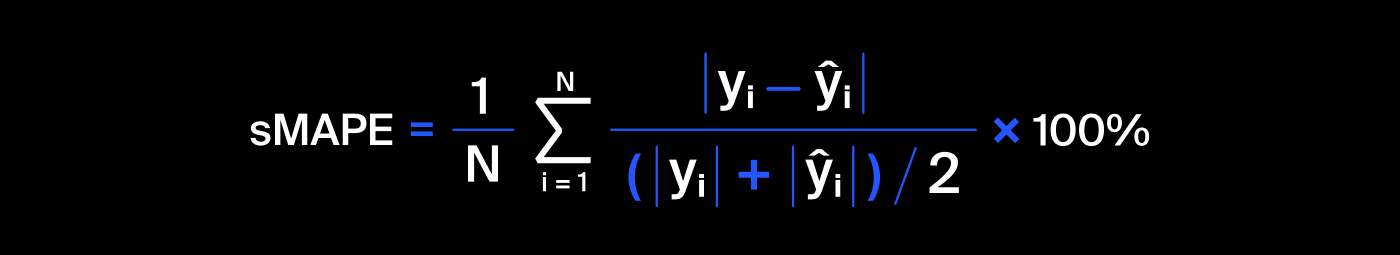

Donde:

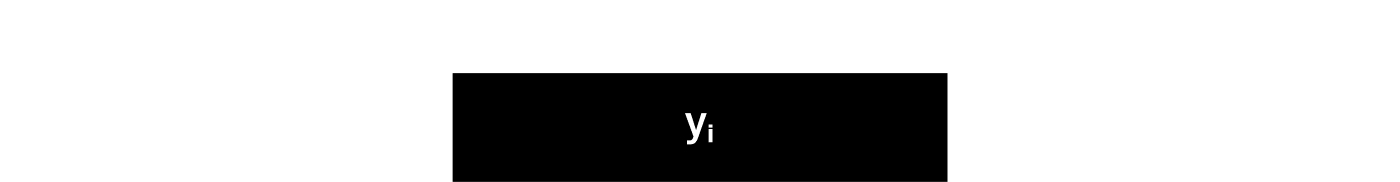

- Valor del objetivo para la observación con el indice i en el conjunto utilizado para medir la calidad

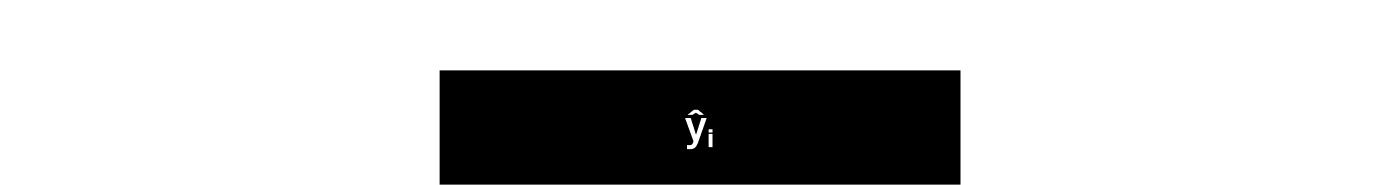

- Valor de la predicción para la observación con el índice i, por ejemplo, en la muestra de prueba

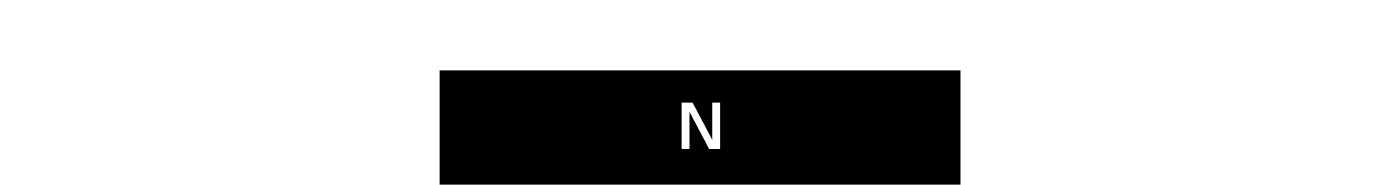
- Número de observaciones de la muestra

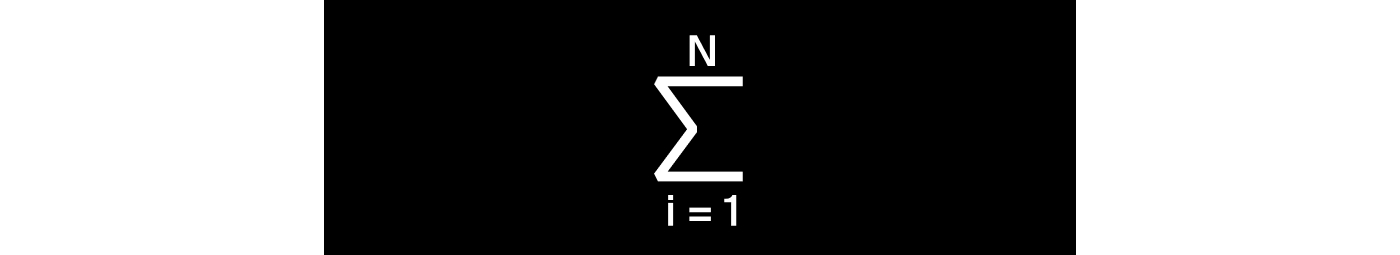
- Suma de todas las observaciones de la muestra

Se necesita predecir dos valores:
1. La recuperación del concentrado de rougher: `rougher.output.recovery`
2. La recuperación final del concentrado: `final.output.recovery`

La métrica final incluye los dos valores:

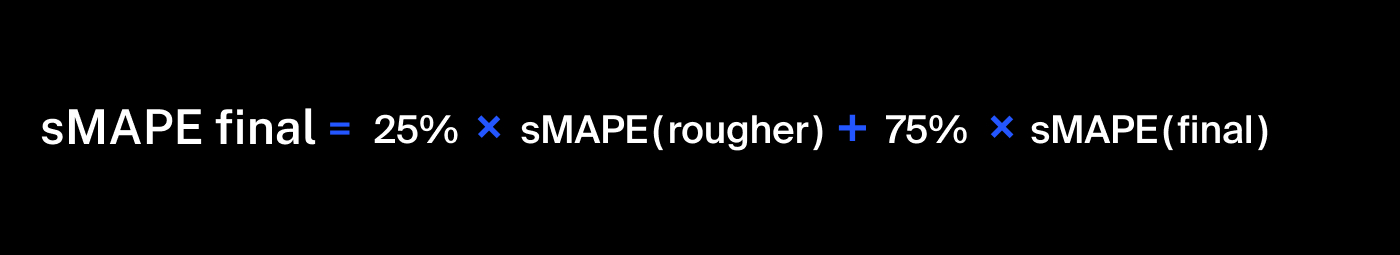

## Descripción del proyecto

Los datos se almacenan en tres archivos:
- `gold_recovery_train.csv`: el dataset de entrenamiento   
- `gold_recovery_test.csv`: el dataset de prueba
- `gold_recovery_full.csv`: el dataset fuente

Los datos se indexan con la fecha y hora de adquisición (date). Los parámetros cercanos en el tiempo suelen ser similares.

Algunos parámetros no están disponibles porque fueron medidos o calculados mucho más tarde. Por eso, algunas de las características que están presentes en el conjunto de entrenamiento pueden estar ausentes en el conjunto de prueba EL conjunto de prueba tampoco tiene objetivos.

El dataset fuente contiene los conjuntos de entrenamiento y prueba con todas las características

Se tiene a disposición los datos en bruto que solamente fueron descargados del almacén de datos. 

### Instrucciones del proyecto

#### Preparación de los datos

1. Abrir los archivos y examinar los datos, sus rutas son las siguientes:

- /datasets/gold_recovery_train.csv
- /datasets/gold_recovery_test.csv
- /datasets/gold_recovery_full.csv

2. Comprobar que el cálculo de la recuperación sea correcto. Calcular la recperación de la característica "rougher.output.recovery" mediante el conjunto de entrenamiento. Encontrar el EAM entre los calculos y los valores de la característica.

3. Analizar las características no disponibles en el conjunto de pruebas. ¿Cuáles son estos parámetros? ¿Cuál es su tipo?

4. Realizar el preprocesamiento de datos.


#### Analizar los datos

1. Observar como cámbia la concentración de metales (Au, Ag, Pb)en función de la etapa de purificación
2. Comparar las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba. Si las distribuciones varían significativamente, la evaluación del modelo no será correcta.
3. Considerar las concentraciones totales de todas las sustancias en las diferentes etapas: materia prima, concentrado de rougher y concentrado final. ¿Se observa algn valor anormal en la distribución total? De ser así, analizar si merece la pena eliminar esos valores en ambas muestras. Describir los resultados y eliminar las anomalías.

#### Construir el modelo

1. Escribir una función para calcular el valor final de sMAPE.
2. Entrenar diferentes modelos. Evaluarlos aplicando la validación cruzada. Elegir el mejor modelo y probarlo utilizando la muestra de prueba. Se deben utilizar las siguiente fórmulas para las métricas de evaluación:

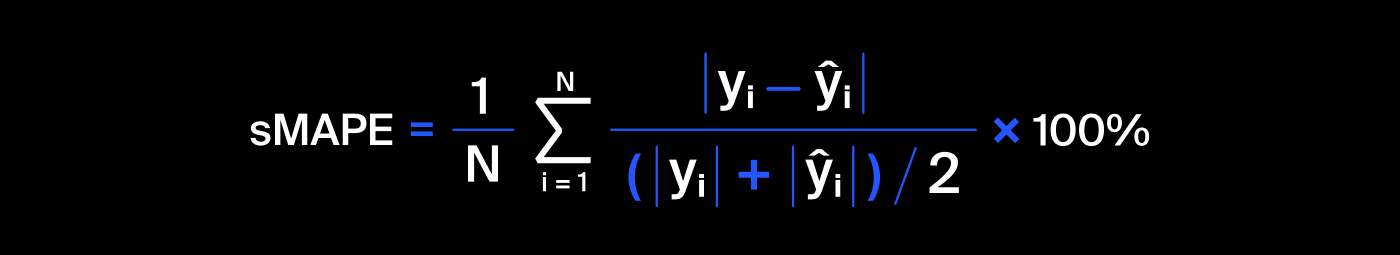

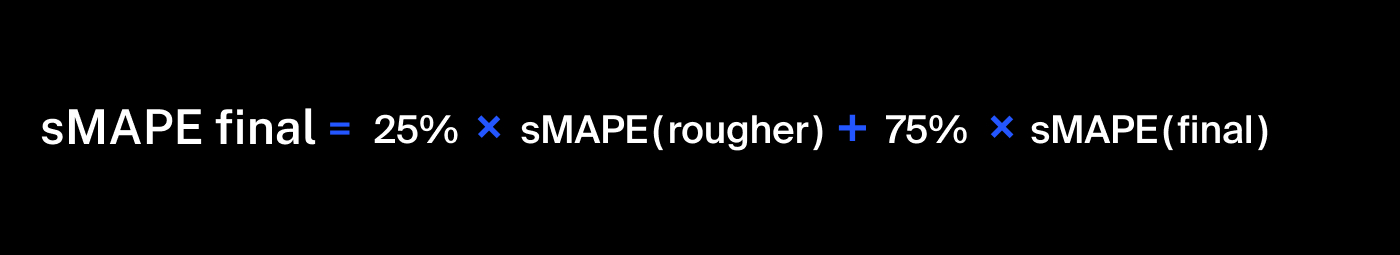

## Descarga y preparación de datos

### Carga de librerías

Se procederá a cargar las librerías que se utilizarán para este proyecto:

In [1]:
# Carga de librerías
from scipy import stats as st
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from numpy.random import RandomState

#Librerías para machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns  ##Libreria para graficar el boxplot

## Para los entrenamientos
from sklearn.metrics import fbeta_score, make_scorer 
from sklearn.model_selection import RandomizedSearchCV

# Para realizar validación cruzada:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente. Una impecable organización: La forma de importar las librerías es excelente, en una misma celda lo distribuyes entre bloques para mejor lectura y organización.
 
</div>

### Carga de bases de datos

In [2]:
gold_recovery_train=pd.read_csv('/datasets/gold_recovery_train.csv')
gold_recovery_test=pd.read_csv('/datasets/gold_recovery_test.csv')
gold_recovery_full=pd.read_csv('/datasets/gold_recovery_full.csv')

Vamos a imprimir una muestra de los datos cargados para dar un vistazo general:

In [3]:
gold_recovery_train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [4]:
gold_recovery_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [5]:
gold_recovery_full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


### Exploración de datos iniciales
Se revisará de forma general la información que poseen las bases de datos:


#### Base de datos gold_recovery_train

In [6]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [7]:
gold_recovery_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


#### Base de datos gold_recovery_test

In [8]:
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [9]:
gold_recovery_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


#### Base de datos gold_recovery_full

In [10]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [11]:
gold_recovery_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


Vamos a analizar los datos que sean NaN y ceros:

In [12]:
nan_count = gold_recovery_train.isnull().sum()
nan_count

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [13]:
zero_count = (gold_recovery_train == 0).sum()
zero_count

date                                             0
final.output.concentrate_ag                   1263
final.output.concentrate_pb                   1263
final.output.concentrate_sol                  1263
final.output.concentrate_au                   1263
                                              ... 
secondary_cleaner.state.floatbank5_a_level       0
secondary_cleaner.state.floatbank5_b_air         0
secondary_cleaner.state.floatbank5_b_level       0
secondary_cleaner.state.floatbank6_a_air         0
secondary_cleaner.state.floatbank6_a_level       0
Length: 87, dtype: int64

**Observaciones sobre los datos:**

- De los datos entregados se observa que la base de datos "gold_recovery_full" se ha dividido en dos conjuntos, uno de entrenamiento: "gold_recovery_train" y "gold_recovery_test". La base de datos test no tiene todas las columnas presentes en la base de datos completa o en la de entrenamiento.
- Todas las bases de datos presentan valores ausentes y ceros, por lo que se debe tomar una decisión sobre el tratamiento que se va a realizar con estos valores ausentes.
- No se ha detectado problemas con los nombres de las columnas y se optará por no cambiarlas para mantener el formato establecido


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien. Has dado una buena descripción general de los datos usando los métodos describe() e info() y has comentado el proceso que hiciste además de hacer énfasis en los datos nulos y 0. Hablaste adecuadamente de la necesidad que habrá de hacer un trato específico sobre estos valores y más aún de la diferencia en términos generales del conjunto de entrenamiento y prueba.
</div>

### Comprobación del cálculo de recuperación

Parte del proyecto incluye validar que el cálculo de la recuperación sea correcta. Se debe caluclar la recuperación de la característica rougher.output.recovery utilizando el conjunto de entrenamiento. y encontrar el EAM entre los calculos realizados y los valores entregados en la base de datos.

Como primer punto vamos a crear una función que calcule la recuperación:

In [14]:
# Función para calcular recovery:
def recovery_calculation(row,c,f,t):
    
    #Se añade esto para evitar tener errores por divisiones por cero
    try:
        resultado = (row[c]*(row[f]-row[t]))/(row[f]*(row[c]-row[t]))*100
        
        return resultado
    
    except ZeroDivisionError:
        
        
        #Lo que de como resultado una división por 0 se dejará como NaN
        return np.nan
    

In [15]:
## Aplicando la función para obtener "rougher.output.recovery":

c='rougher.output.concentrate_au'
f='rougher.input.feed_au'
t='rougher.output.tail_au'

gold_recovery_train['rougher_output_recovery_calculated'] = gold_recovery_train.apply(lambda row: recovery_calculation(
    row,c,f,t), axis=1)

gold_recovery_train['rougher_output_recovery_calculated']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher_output_recovery_calculated, Length: 16860, dtype: float64

In [16]:
## Calculando el EAM
# Se intentó utilizar la función de "mean_absolute_error", pero debido a que existen valores NaN y otros que considera infinit
# Se optó por hacer el calculo de otra forma.

#Se calculará de la siguiente manera, utilizando la función abs() y mean():
EAM_rougher_output_recovery = (gold_recovery_train['rougher_output_recovery_calculated']-gold_recovery_train["rougher.output.recovery"]).abs().mean()
print(f'El EAM calculado entre el rougher.output.recovery en la base de datos y el calculado es de: {EAM_rougher_output_recovery}')



El EAM calculado entre el rougher.output.recovery en la base de datos y el calculado es de: 9.303415616264301e-15


Para mejorar este análisis se observará como se encuentran los datos entregados y los calculados utilizando la función describe, con la que podemos analizar los promedios, desviación estandar y cuartiles

In [17]:
gold_recovery_train['rougher.output.recovery'].describe()

count    14287.000000
mean        82.394201
std         15.096808
min          0.000000
25%         79.818372
50%         85.235997
75%         90.131691
max        100.000000
Name: rougher.output.recovery, dtype: float64

In [18]:
gold_recovery_train['rougher_output_recovery_calculated'].describe()

count     14547.000000
mean         31.414147
std        3302.773106
min     -366924.161290
25%          79.704808
50%          85.229912
75%          90.203432
max       13802.071756
Name: rougher_output_recovery_calculated, dtype: float64

**Observación sobre los resultados**

- Observando el resultado del EAM entre la característica original y la calculada tenemos un resultado de 9.303415616264301e-15, el cual implica que la diferentia entre ambos datos en mínima, por ser un valor muy pequeño.
- A pesar de lo mencionado en el punto anterior para los datos calculados almacenados en "rougher_output_recovery_calculated" se observa que existen valores extremos que alteran la desviación estandar. Esto puede deverse a que hay valores de cero y posiblemente cercanos a cero que hacen que las divisiones aumenten de magnitud.
- A pesar de los datos anormales encontrado en los calculos que se realizó se observa que por cuantiles los datos calculados son muy similares a los entregados, por lo que se puede concluir que los datos tienen distribuciones similares.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buena implementación y evaluación de la función de eficiencia, haz creado la función de forma independiente lo cuál le da modularidad al código y es una muy buena práctica, el cálculo de la función es acertado y la conclusión también. Si se quiere ser más detallado sería posible dar una pequeña discusión de qué implica para el análisis posterior que este valor sea tan bajo. Adicionalmente es más sugerible usar un lenguaje más técnico para referirse a algo bajo que cercano a cero, por ejemplo hablar de ordenes de magnitud o si se quiere ser más técnico y preciso compararlo con la desviación estandar y evaluar la regla de las tres desviaciones.</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
Se añadió mas comentarios a las observaciones, enfocandose en la desviación estandar y en los cuartiles
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente los nuevos análisis añadidos
</div>

### Análisis de características no disponibles en el conjunto de prueba

A continuación vamos a revisar cuales son los parámetros que no están disponibles en el conjunto de pruebas. Primeramente vamos a utilizar la siguiente sección de código para observar cuales son las columas faltantes:

In [19]:
## Estas son las columnas que no estan en el test
caracteristicas_faltantes = set(gold_recovery_train.columns) - set(gold_recovery_test.columns)
caracteristicas_faltantes

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Para facilitarnos el análisis de las características faltantes vamosa utilizar el siguiente diagrama donde se encuentra el proceso que pasa el mineral y donde se detallan las variables utilizadas en las bases de datos para cada sección del proceso.
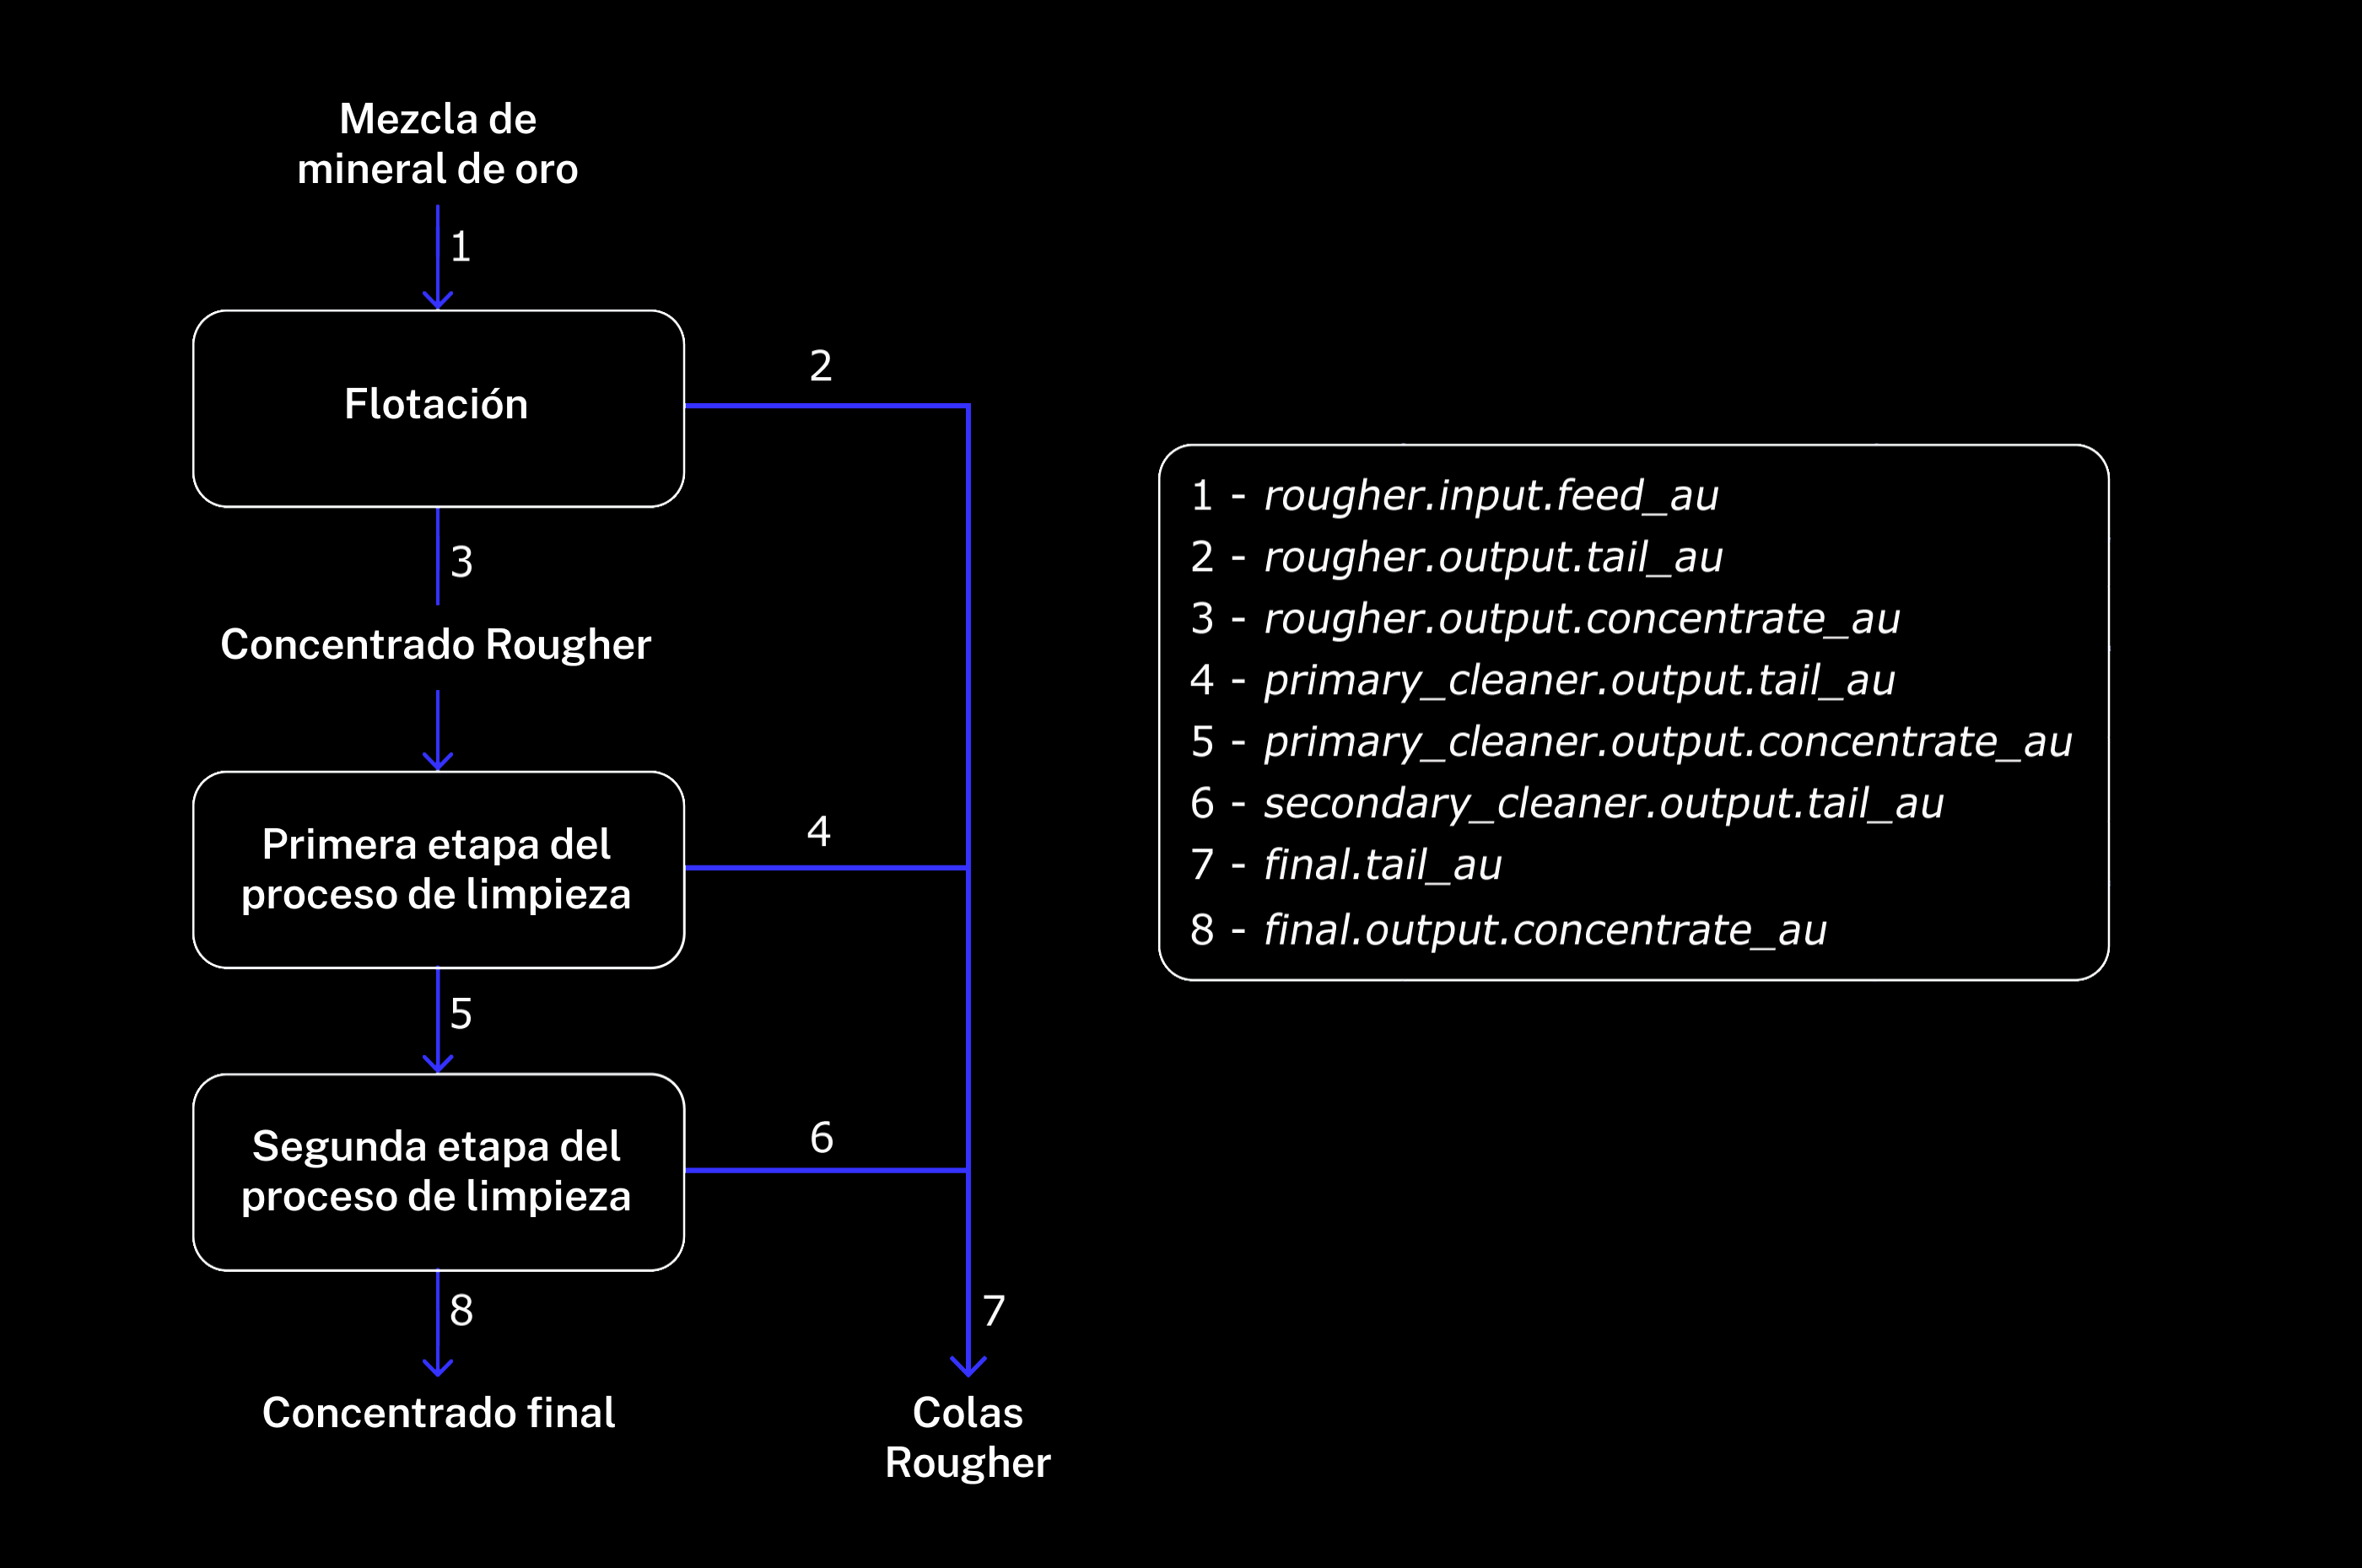

**Caracteríisticas faltantes**

-`final.output.concentrate` - Esta característica es del concetrado final despues de todo el proceso para obtener los minerales deseados

-`final.output.recovery`: (8)Calculo de recuperación final

-`final.output.tail`: (7)Cola rougher final

-`primary_cleaner.output.concentrate`: (5)Resultado de la primera etapa del proceso de limpieza

-`primary_cleaner.output.tail`: (4)Cola resultado de la primera etapa del proceso de limpieza

-`rougher.calculation.floatbank`: Resultados del proceso de flotación

-`rougher.calculation.sulfate_to_au_concentrate`: Resultado deprocesos de adición, reactivos de flotación

-`rougher.output.concentrate`: (3)Resultado del concentrado despues del proceso de flotación

-`rougher.output.recovery`: Calculo de recuperación despues del proceso de flotación

-`rougher.output.tail`: (2)Cola obtenida despues del proceso de flotación

-`secondary_cleaner.output.tail` - (6)Cola obtenida despues del segundo proceso de limpieza



Realizando una observación de los parámetros que no se encuentran en la base de datos test, se observa que en su mayoría son los resultados de los procesos de flotación y de limpieza del mineral. Estos datos son importantes para conocer el resultado, sin embargo no existe problema con esto, ya que en la base de datos "full" se encuentra todas las características, incluida las que faltan.

### Preprocesamiento de datos

Despues de analizar de forma breve como se encuentran los datos, el mayor problema que encontramos en las bases de datos es que tienen muchos datos ausentes, por lo cual se ha considerado las siguientes opciones:
- Eliminar las filas en las cuales alguna de las columnas estan ausentes.
- Rellenar los datos ausentes con ceros
- Utilizar la función ffill para rellenar los valores ausentes

De estas tres opciones se ha optado por la primera opción ya que se ha tomado las siguientes consideraciones:
- Rellenar los datos ausentes con ceros podría alterar en gran forma los datos y los calculos, dado que hay muchos valores ausentes en las múltiples columnas de características.
- Rellenar los datos ausentes con f.fill implica añadir un valor a la información que no conocemos que tanto puede diferir de lo real.
- A pesar de que existe una gran cantidad de datos ausentes, al eliminar estos valores aun tenemos una base de datos grande con la cual podemos trabajar.



In [20]:
gold_recovery_train.shape

(16860, 88)

In [21]:
gold_recovery_test.shape

(5856, 53)

In [22]:
gold_recovery_full.shape

(22716, 87)

In [23]:
# Rellenando los datos ausentes de las bases de datos:

df_train_fill = gold_recovery_train.ffill(axis=0)  ## Se utiliza axis=0 para que copie entre filas
df_test_fill = gold_recovery_test.ffill(axis=0)
df_full_fill = gold_recovery_full.ffill(axis=0)


In [24]:
# Eliminando los datos ausentes:
gold_recovery_train.dropna(how='any', inplace=True)
gold_recovery_test.dropna(how='any', inplace=True)
gold_recovery_full.dropna(how='any', inplace=True)

In [25]:
gold_recovery_train.shape

(11017, 88)

In [26]:
gold_recovery_test.shape

(5383, 53)

In [27]:
gold_recovery_full.shape

(16094, 87)

In [28]:
### Calculo de que porcentaje de datos se redujeron:
porcentaje_restante_train = 100*11017/16860
procentaje_restante_test = 100*5383/5856
porcentaje_restante_full = 100*16094/22716

print(f'Porcentaje restante de train: {porcentaje_restante_train}')
print(f'Porcentaje restante de test: {procentaje_restante_test}')
print(f'Porcentaje restante de full: {porcentaje_restante_full}')


Porcentaje restante de train: 65.34400948991696
Porcentaje restante de test: 91.92281420765028
Porcentaje restante de full: 70.84874097552385


**Observaciones sobre los datos ausentes.**

Despues de probar los métodos para eliminar los datos ausentes se ha considerado dos reslutados:
- Eliminando los datos ausentes se han reducido considerablemente la cantidad de datos. Siendo que se borraron aproximadamente 6 mil datos. Esto es un gran número de datos borrados, pero que sin embargo nos deja aun con una buena cantidad de información para utilizar en el modelamiento. Segun los datos obtenidos la base de datos que más sufre al eliminar los valores ausentes en la de train, la cual se queda con el 65% de los datos totales
- Rellenando los datos tenemos la ventaja de que no se pierde volumen de datos, sin embargo, al rellenar, toda la información añadida es suposiciones o información incorrecta, y como se puede observar, es una gran cantidad de informacón la que falta, por lo que estaríamos añadiendo una gran cantidad de datos que pueden estar incorrectos.


****************************************Revisar**********************************************
- Se trabajará con las dos bases de datos para analizar como se comporta:

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien analizaste más profundamente los datos faltantes y no solo eso hiciste un grán análisis inicial acerca de cómo estas variables están relacionadas con el proceso de medición si no que fuiste al detalle de describir algunas de las columnas faltantes de forma detallada, esto es algo importante y muy virtuoso de un científico de datos, aunque también te sugiero  que no hay que ser tan convervador con las acciones a tomar, es verdad que en general es mejor ser conservador a la hora de tratar los datos que hacer hipótesis arriesgadas, pero mientras se use la estadística para argumentar las acciones tomadas está bien, por ejemplo, usar ffill era una buena opción debido a qué indagando las variaciones entre valores con fechas cercanas son muy pequeñas, lo suficiente como para usar sin problema ffill, esto sería posible indagarlo examinando variaciones entre sucesivos o en ventanas de tiempo. Adicionalmente es positivo cuando eliminas datos ponerlos en términos de proporción para ser un poco más técnicos ya que permite tener una idea más precisa de qué tan poco o mucho afectaron porcentualmente hablando.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
Se añadió el calculo de los porcentajes restantes de datos despues de eliminar los datos ausentes, se probó rellenando 
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Está muy bien el nuevo análisis de restantes y como te das cuenta sí se están eleminando muchos valores, por esto, es mucho mejor usar el ffill en lugar del dropna (como puedes ver usar el ffill sobre una variable nueva pero posteriormente aplicas dropna sobre el dataset que haz estado trabajando y que seguirás usando posteriormente, lo cuál altera fuertemente el análisis ya que como ves en el conjunto de entrenamiento se pierden casi el 35% de los datos, lo cuál no es una cantidad menor. Además existe un motivo por el cuál se puede usar el ffill y es debido a que los datos cercanos entre fechas tienen valores demasiado similares, lo cuál no sería asumir ninguna posición incorrecta y por el contrario es un argumento de peso para usar ffill.
</div>

## Análisis de datos

Una vez ajustados los datos y solucionado el problema de los datos ausentes vamos a realizar el análisis de los datos. A continuación se describirán los puntos que se van a analizar:

### Cambio de concentración de metales

Como primer punto se va a analizar cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación. Según las información entregada, se tienen dos etapas de purificación (primary, secondary), por lo tanto las características que se van a comparar son las siguientes.

- Para la etapa primaria:

Datos de entrada:

 'rougher.output.concentrate_au'
 'rougher.output.concentrate_pb'
 'rougher.output.concentrate_ag'

Datos de salida
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_ag'
 
- Para la etapa secundaria:

Datos de entrada 
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_ag'
   
Datos de salida
 'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',  
 
 De estos datos, se oberva que los datos de salida de la primera etapa son los mismos que los de entrada para la etapa secundaria, por lo que se resume en tres datos: rougher.output.concentrate, 'primary_cleaner.output.concentrate' y 'final.output.concentrate' para cada metal.

Para realizar la comparativa de las concentraciones de cada metal por etapa se realizará histogramas de las concentraciones entregadas en la base de datos "full". A continuación se muestran los resultados:

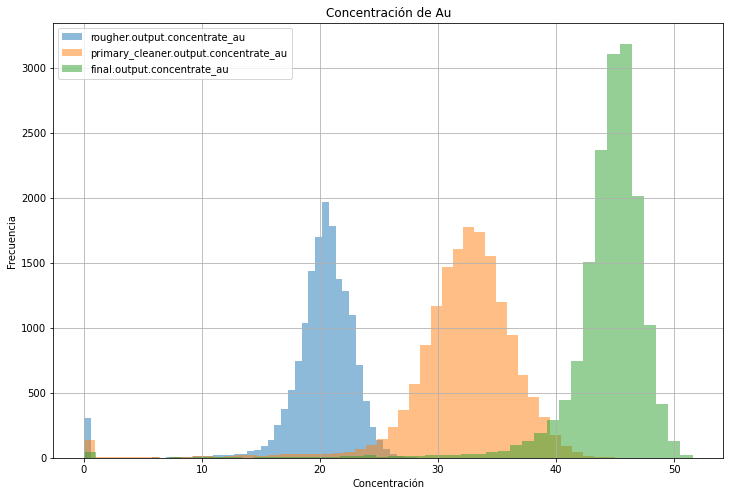

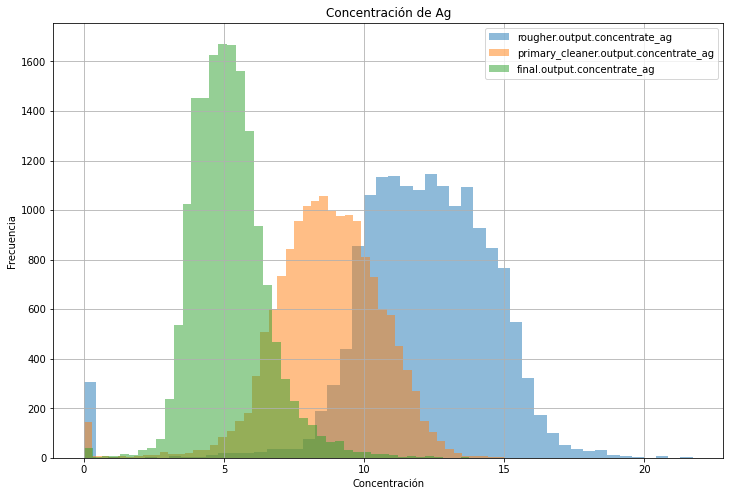

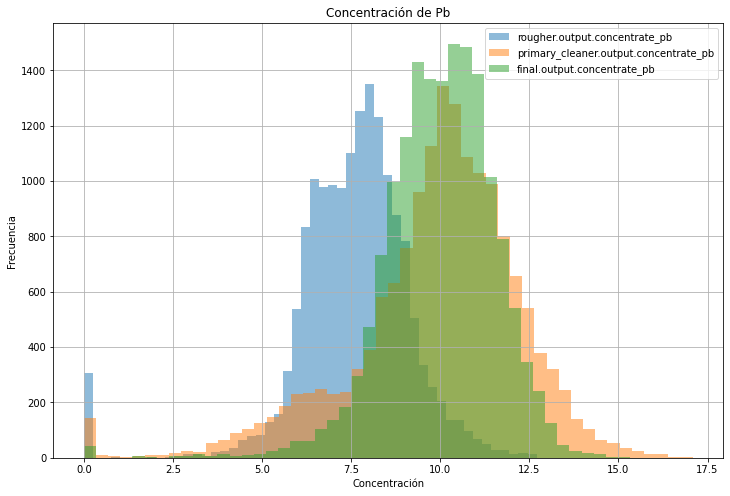

In [29]:
## Gráficas de concentraciones de metales:
caracteristicas = ['rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_']
metales = [ 'au', 'ag', 'pb']

for m in metales:
    plt.figure(figsize=(12,8))
    for c in caracteristicas:
            
        variable = c+m
        gold_recovery_full[variable].hist(bins=50, alpha=0.5, label = variable)
    
    plt.legend()
    plt.title(f'Concentración de {m.capitalize()}')
    plt.xlabel('Concentración')
    plt.ylabel('Frecuencia')
    plt.show()

**Observaciones sobre las gráficas obtenidas:**
- Con respecto a la concentración de oro (Au) se observa que pasando cada etapa de purificación se observa que la concentración va subiendo, siendo que se tiene un pico de concentración en 45
- La concentración de plata (Ag) se va reduciendo conforme pasa las diferentes etapas de purificación. Se logra un pico en 5, con la última etapa de purificación.
- Con respecto al plomo (Pb), se observa que despues del primer proceso de limpieza no se obtiene mucha diferencia con respecto al segundo proceso de limpieza en relación a la concentración del plomo
       

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Excelente análisis, las gráficas están espectuaculares, muy agradables estéticamente y completamente informativas, desde los colores, tamaños y etiquetado interno. Las conclusiones son precisas y adecuadas a lo esperado, una sugerencia sería crear una función de histograma debido a que el proceso se repite las tres veces y las variaciones son muy pequeñas a nivel de código, con esto aportas modularidad y sigues el principio de buenas prácticas DRY (Don't Repeat Yourself). ¿Te gustaría saber más de buenas prácticas de código?.
</div>

### Comparación de las distribuciones de tamaño de las partículas de la alimentación

 Para este punto se va comparar las distribuciones del tamaño de las partículas de alimentación en el conjunto de entrenamiento y en el conjunto de prueba. Si las distribuciones varían siginificativamente, implicará que la evaluación del modelo no será correcta. Para verificar esto se utilizarán las características: 

"primary_cleaner.input.feed_size "
"rougher.input.feed_size"

Se utilizarán métodos gráficos para estudiar como se ecuentran didstribuidos los tamaños de partíclulas en los dos conjuntos de entrenamiento:


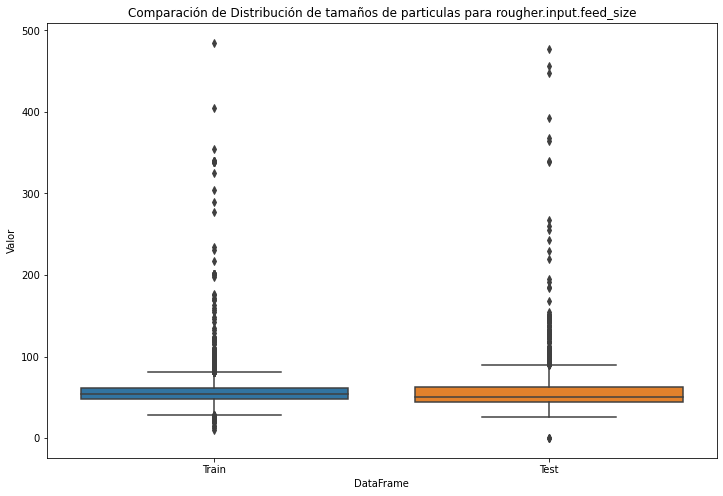

In [30]:
### Histograma para partículas de la característica "rougher.input.feed_size":

# Utilizando boxplot

gold_recovery_train['df'] = 'Train'
gold_recovery_test['df'] = 'Test'

data_concatenada = pd.concat([gold_recovery_train, gold_recovery_test])
                              
plt.figure(figsize=(12,8))
sns.boxplot(x='df', y='rougher.input.feed_size', data=data_concatenada)

plt.title('Comparación de Distribución de tamaños de particulas para rougher.input.feed_size')
plt.xlabel('DataFrame')
plt.ylabel('Valor')

plt.show()

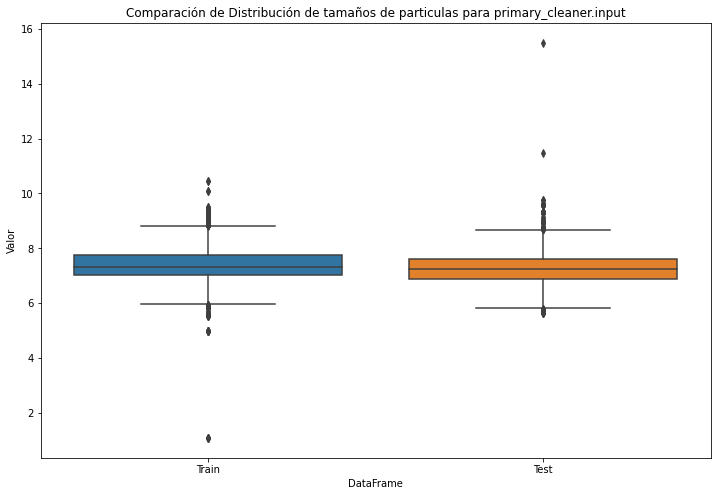

In [31]:
## Para la variable "primary_cleaner.input"

plt.figure(figsize=(12,8))
sns.boxplot(x='df', y='primary_cleaner.input.feed_size', data=data_concatenada)

plt.title('Comparación de Distribución de tamaños de particulas para primary_cleaner.input')
plt.xlabel('DataFrame')
plt.ylabel('Valor')

plt.show()

**Observaciones:**
Se ha detectado que utilizando un boxplot, las distribuciones entre las dos bases de datos es muy similar, siendo que los cuatiles se encuentran relativamente en las mismas posiciones y los valores atípicos no son frecuentes. Se intentará hacer un histograma con el fin de ver otra perspectiva de los datos.
    

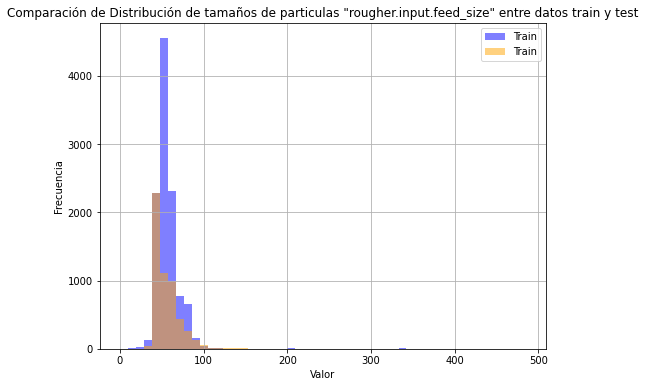

In [32]:
### Realizando un histograma

plt.figure(figsize=(8, 6))
gold_recovery_train['rougher.input.feed_size'].hist(bins=50, alpha=0.5, label='Train', color='blue')
gold_recovery_test['rougher.input.feed_size'].hist(bins=50, alpha=0.5, label='Train', color='orange')

# Agregar título y etiquetas
plt.title('Comparación de Distribución de tamaños de particulas "rougher.input.feed_size" entre datos train y test')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show
# Mostrar la leyenda
plt.legend()

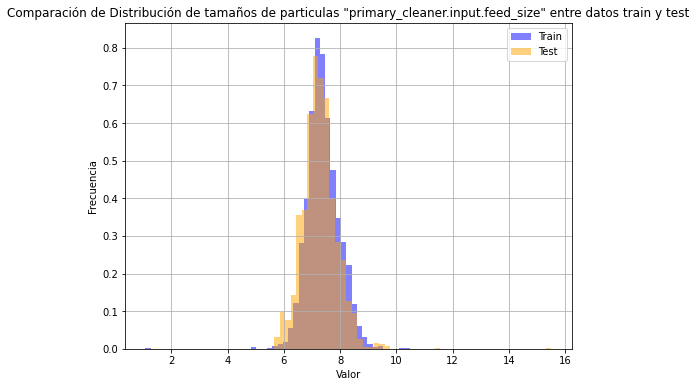

In [33]:
### Realizando un histograma

plt.figure(figsize=(8, 6))

#Se utiliza density=true para  
gold_recovery_train['primary_cleaner.input.feed_size'].hist(bins=50,  density=True, alpha=0.5, label='Train', color='blue')
gold_recovery_test['primary_cleaner.input.feed_size'].hist(bins=50, density=True, alpha=0.5, label='Test', color='orange')

# Agregar título y etiquetas
plt.title('Comparación de Distribución de tamaños de particulas "primary_cleaner.input.feed_size" entre datos train y test')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show
# Mostrar la leyenda
plt.legend()

Gracias a los histogramas se puede corroborar lo mencionado previamente, las distribuciones son muy similares por lo que la evaluación del modelo no tendrá problemas

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Preciso el análisis y la conclusión esperada, con esa conclusión se puede proseguir el análisis y se evita tener que hacer nuevos tratemientos o explorar una forma de alinear los datos para superar una situación de ese tipo, de nuevo excelentes gráficos, muy explicativos, el grid() da más claridad y además se entienden por sí solos.
</div>

### Comparación de las concentraciones totales de todas las sustancias en las diferentes etapas

Vamos a analizar las concentraciones de las sustacias utilizadas en las etapas: materia prima, concentrado rougher y concentrado final. Dado que no se especifica a cuales sustancias se refiere se asumirá que se refieren a la característica "concentrate_sol", que puede referise a soluciones químicas
 
 Para esto se van a tomar en cuenta de la base de datos "full" las siguientes características:
 - "rougher.input.feed_sol"
 - "rougher.output.concentrate_sol"
 - "final.output.concentrate_sol"
 
De la misma manera como se realizó con los metales se graficará histograma que muestre las concetraciones dependiendo de la etapa.

In [34]:
## Gráficas de concentraciones de soluciones:
def concentracion_soluciones(data):

    caracteristicas_sol = ['rougher.input.feed_sol', 'rougher.output.concentrate_sol', 'final.output.concentrate_sol']

    plt.figure(figsize=(12,8))
    for c in caracteristicas_sol:
        data[c].hist(bins=50, alpha=0.5, label=c)


    plt.legend()
    plt.title(f'Concentración de sustancias')
    plt.ylabel('Concentración')
    plt.show()

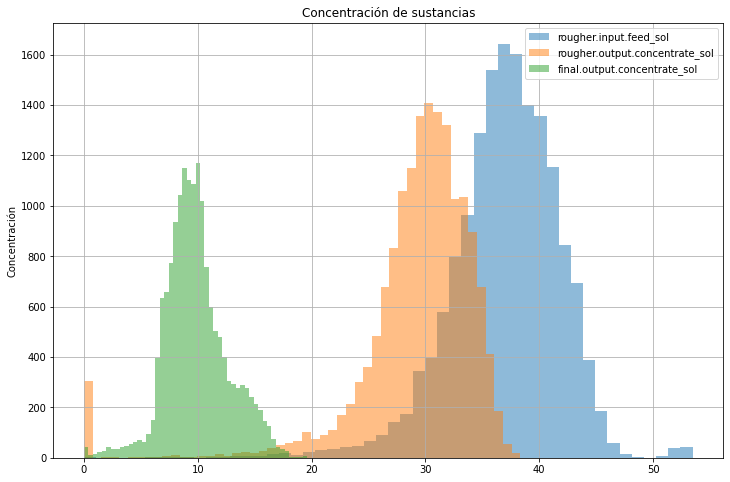

In [35]:
concentracion_soluciones(gold_recovery_full)

**Observaciones sobre las gráficas:**

Despues de obtener las gráficas de la concentración de sustancias se observa que existen anomalías, en particualar en los valores cercanos a 0 de la característica rougher.output.concentrate_sol. Estos datos anormales pueden causar problemas al momento de realizar el entrenamiento de los modelos por lo que una opción sería eliminar estos datos. Vamos a observar como se muestran estos picos en la base de datos de train, que es la que se utilizará para el entrenamiento posteriormente:

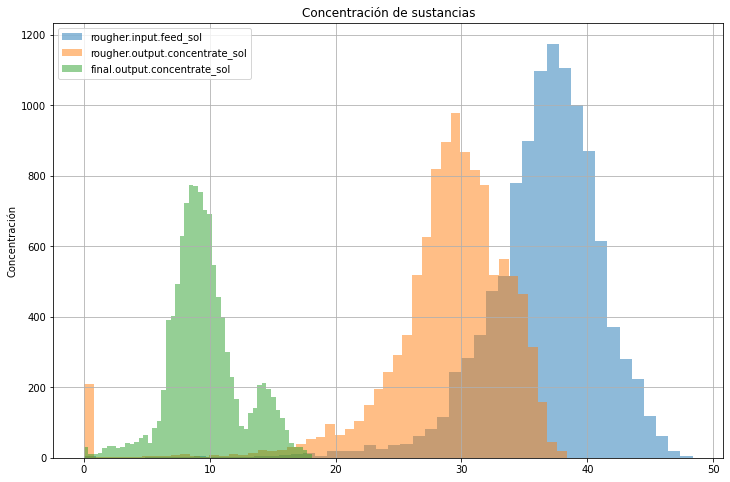

In [36]:
### Para la base de datos "gold_recovery_train":

concentracion_soluciones(gold_recovery_train)

Se ha confirmado la existencia de los valores atípicos en la base de datos de entrenamiento también, por lo que se optará por eliminar estos datos.

In [37]:
gold_recovery_train.shape

(11017, 89)

In [38]:
train_filtrado = gold_recovery_train.loc[gold_recovery_train['rougher.output.concentrate_sol']<1]
train_filtrado['rougher.output.concentrate_sol'].describe()


count    211.000000
mean       0.004406
std        0.060557
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.879593
Name: rougher.output.concentrate_sol, dtype: float64

Observamos que los elementos menores a a uno son 211, dado que es una cantidad pequeña de datos vamos a eliminarlos para evitar alteraciones en los modelos depredicción:

In [39]:
gold_recovery_train = gold_recovery_train.loc[gold_recovery_train['rougher.output.concentrate_sol']>1]

In [40]:
gold_recovery_train.shape

(10806, 89)

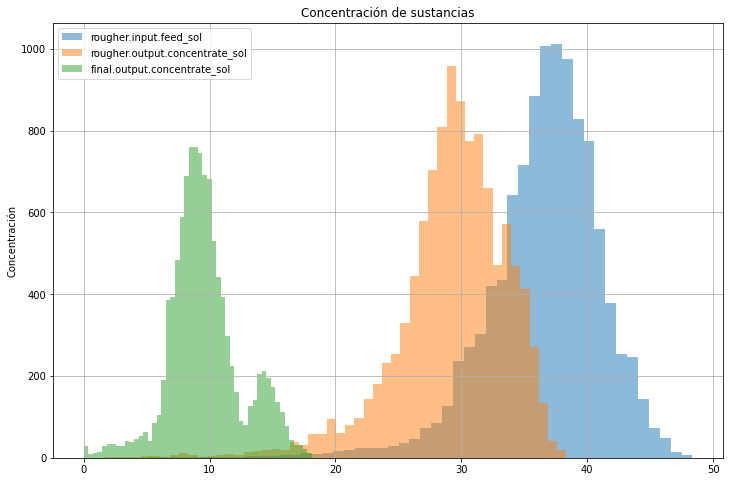

In [41]:
concentracion_soluciones(gold_recovery_train)

De forma gráfica se puede observar que ya no existen picos en 0, por lo que esta base de datos se encuentra mejor preparada para los entrenamientos posteriores. Estas características no se encuentran en el conjunto de prueba, por lo que no es necesario analizar datos atípicos

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Aquí es necesario aplicar una correción. Hiciste un buen análisis inicial, y logras detallar la existencia de esos valores cercanos a 0 que son atípicos, el problema es no tratarlos, esto es una aproximación conservadora que puede ser entendida pero tiene consecuencias problemáticas. Los datos atípicos si bien representan una porción pequeña de los datos (lo cuál está bien y de allí su condición de atípicos) pueden alterar seriamente un análisis o modelo, debido a que se encuentran en puntos extremos, así sean pocos, pueden generar variaciones fuertes en los pesos internos que maneja un modelo pues este, al intentar predecirlos empieza a sobreajustar el modelo y finalmente termina afectando muy negativamente. Para este caso sería importante ubicar estos datos atípicos y tratarlos, además sería una gran adición explicar en cuales conjuntos de datos (prueba y entrenamiento) pueden ser eliminados y por qué.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
Se analizó cuantos valores menores a 1 existían y se observó que no era una cantidad grande por lo que se porcedió a eliminarlos, con esto se borraron los picos que aparecían de forma gráfica. Esto alteró el resto del proyecto donde se mejoró la calidad de los modelos de predicción y se lograron valores con menor cantidad de error. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien el nuevo tratamiento de outliers, recomendaría usar un threshold menor como valores inferiores a 0.01 o incluso establecerlo a partir de los valores que superan tres desviaciones estandar (la regla de para distribuciones estándares la mayoría de valores se encuentran en las primeras tres desviaciones y los demás valores si son atípicos suelen atribuirse a errores de medida o captación de datos).
</div>

## Construcción de modelo

### Entrenamiento de modelos


Considerando que para la base de datos test no se tienen todos los datos que están en la base de datos de train, no se van a tomar en cuenta estas características para el entrenamiento, las cuales fueron almacenadas previamente en la variable "caracteristicas_faltantes".
Las características objetivo para nuestro análisis son: "rougher.output.recovery" y "final.output.recovery". 

Con estas consideraciones realizaremos a continuación el entrenamiento del modelo

**Dividiendo las bases de datos en entrenamiento y validación**

In [42]:
## Estableciendo los objetivos:
targets=["rougher.output.recovery",  "final.output.recovery"]

# Se crea una base de datos a partir de "train" tomando en cuenta solo las columnas que estan en "test"
df_features = gold_recovery_train[list(gold_recovery_test.drop(columns=["date","df"]).columns)]
df_targets = gold_recovery_train[targets]

##Usando el full:
#df_features_full = gold_recovery_full[list(gold_recovery_test.drop(columns=["date","df"]).columns)]
#df_targets_full = gold_recovery_full[targets]

In [43]:
df_features

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,123.381787,8.028927,6.50,1.304232,1648.421193,-400.382169,1648.742005,-400.359661,1648.578230,-399.363624,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,120.878188,7.962636,6.50,1.302419,1649.820162,-399.930973,1649.357538,-399.721222,1648.656192,-401.195834,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,105.666118,7.955111,6.50,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,1647.896999,-399.988275,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,98.880538,7.984164,6.50,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [44]:
df_targets

,rougher.output.recovery,final.output.recovery
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016
...,...,...
16855,89.574376,73.755150
16856,87.724007,69.049291
16857,88.890579,67.002189
16858,89.858126,65.523246


In [45]:
# Vamos a dividir los datos en entrenamiento y validación con la siguiente función:

def train_valid_split(features, target):
    
    features_train, features_valid, target_train, target_valid = train_test_split(
            features, target, test_size=0.25, random_state=54321)
    return features_train, features_valid, target_train, target_valid


In [46]:
#Dividiendo en datos de entrenamiento y validación
features_train, features_valid, target_train, target_valid = train_valid_split(df_features, df_targets)

A continuación se mostrará de forma gráfica como estan los datos de validación para observar que tan similar predicen los modelos a los valores reales

Text(0, 0.5, 'Densidad')

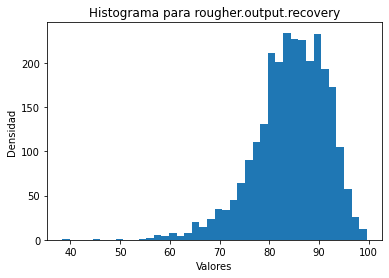

In [47]:
## Target de forma gráfica('rougher.output.recovery'):
#target_valid
plt.hist(target_valid['rougher.output.recovery'], bins=40)
plt.title('Histograma para rougher.output.recovery')
plt.xlabel('Valores')
plt.ylabel('Densidad')

Text(0, 0.5, 'Densidad')

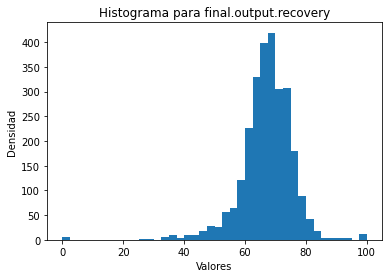

In [48]:
## ('final.output.recovery'):
#target_valid
plt.hist(target_valid['final.output.recovery'], bins=40)
plt.title('Histograma para final.output.recovery')
plt.xlabel('Valores')
plt.ylabel('Densidad')

A continuación vamos a definir las funciones para realizar los diferentes calculos necesarios:

### Función para calculo de sMAPE

A continuación el enfoque va a estar en la construcción del modelo. Para esto primero se va a escribir una función para calcular el valor final de sMAPE, el cual está definido por la siguiente formula:

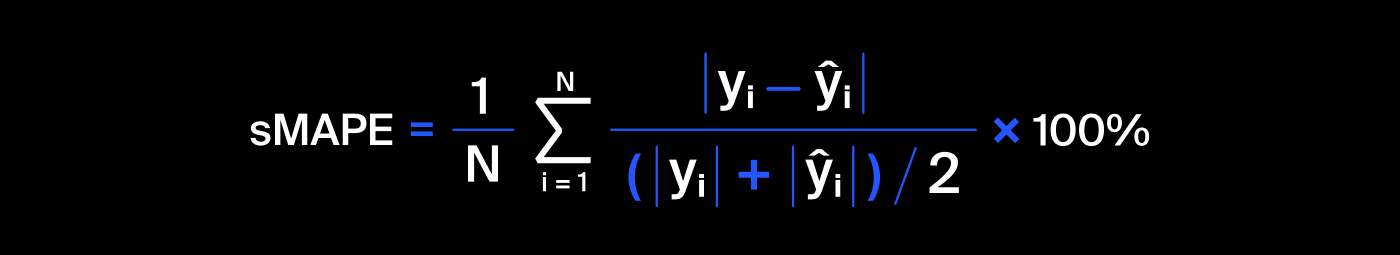

A continuación vamos a escribir la función para calcular este valor

In [49]:
def smape (y, y_pred):
    
    #Se le pone np.array para que pueda hacer operaciones vectorizadas.
    
    diff= np.array(y - y_pred)
    abs_y = np.array(abs(y))
    abs_y_pred = np.array(abs(y_pred))
    abs_diff = np.array(abs(diff))
    
    return 100 * np.nansum(abs_diff / ((abs_y + abs_y_pred) / 2)) /len(y) ##Se puede sumar un 0.0001 para evitar division 0

#def smape_final(y_vect, y_pred_vect, **kwargs):  ## Se usa el kwargs xq vamos a utilizar el make_scorer
    #smape_rougher = smape(y_vect["rougher.output.recovery"], y_pred_vect[:,1])
    #smape_cleaner = smape(y_vect["final.output.recovery"], y_pred_vect[:,0])

def smape_final(smape_rougher_recovery, smape_final_recovery):
    
    return 0.25*smape_rougher_recovery + 0.75*smape_final_recovery
    
    

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy bien la creación de la función sMAPE, lo hiciste modularmente, los argumentos de cada función son pertinentes, código descriptivos, muy buenas prácticas de código y desarrollo.
</div>

La validación cruzada es una técnica comúnmente utilizada para evaluar modelos de regresión. Uno de los métodos más utilizados es la "Validación Cruzada K-Fold" (K-Fold Cross-Validation). Se investigó como utilizar este método de validación.

K-Fold Cross-Validation:
- Divide tu conjunto de datos en K "folds" (particiones) del mismo tamaño.
- Entrena y evalúa el modelo K veces. En cada iteración, utiliza K-1 folds para entrenar el modelo y el fold restante para evaluarlo.
- Calcula la métrica de evaluación en cada iteración (por ejemplo, el error cuadrático medio o el coeficiente de determinación R²).
- Toma el promedio de las métricas de evaluación como la métrica final de evaluación del modelo.

Este método ayuda a reducir la variabilidad asociada con una única partición de datos y proporciona una evaluación más robusta del rendimiento del modelo.

Para este caso, se utiliza la métrica R² (scoring='r2'), el cual es una métrica estadística que proporciona información sobre la proporción de la variabilidad de la variable dependiente que es explicada por el modelo de regresión. En otras palabras, R2  mide la proporción de la varianza en la variable de respuesta que puede ser explicada por las variables independientes en el modelo. Este valor puede estar en el rango de 0 a 1.

- R2 = 0: El modelo no explica ninguna variabilidad en la variable dependiente.
- R2 = 1: El modelo explica toda la variabilidad en la variable dependiente.
- 0 < R2 < 1: El modelo explica una proporción específica de la variabilidad en la variable dependiente.

In [50]:
## Función para realizar la validación cruzada:
## Validacion cruzada

def cross_val_r2(model, features, target):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Realizar validación cruzada y obtener la métrica de rendimiento (por ejemplo, R²)
    metricas = cross_val_score(model, features, target, scoring='r2', cv=kf)
    
    # Imprimir el promedio de las métricas
    print(f"R² promedio: {metricas.mean()}")

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente lo que tiene que ver en selección de features y las variables objetivo. Entendiste exactamente la situación al descartar estos valores, además que previamente muy acertadamente hablaste de cómo las columnas del conjunto de prueba sin datos eran aquellas se obtenían posteriormente y no antes en el proceso de medida, así que tiene mucho sentido descartar las features que no se pueda obtener antes de la medición, pues no se podrían hacer inferencias con el modelo al no poseer esto. Además, hiciste algo muy valioso que no solamente implementaste la validación cruzada, la implementaste a través de una función y todo usando las funciones existentes de SKlearn, esto demuestra un manejo muy cómodo con la librería y lo que estás haciendo, Felicitaciones!.
</div>

**Entrenando con el modelo de regresión lineal**

In [51]:
def LinearRegMod(features_train, features_valid, target_train, target_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
          
    result = mean_squared_error(target_valid, predictions_valid)**0.5
        
    print("RECM del modelo de regresión lineal en el conjunto de validación:", result)
       
    return predictions_valid, model

In [52]:
pred_linear_reg, model_linear_reg= LinearRegMod(features_train, features_valid, target_train, target_valid)

RECM del modelo de regresión lineal en el conjunto de validación: 5.867966001760852


In [53]:
pred_linear_reg

array([[78.44517452, 62.9897341 ],
       [81.29534241, 68.16358038],
       [89.99064678, 72.19417538],
       ...,
       [88.06433044, 67.52224313],
       [86.36625976, 68.28220632],
       [87.49723861, 69.34478092]])

Text(0, 0.5, 'Densidad')

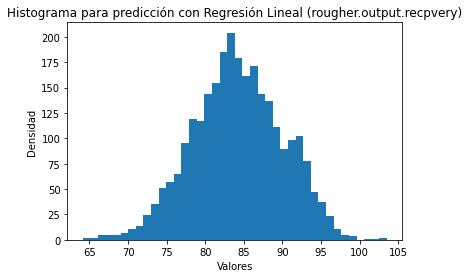

In [54]:
pred_linear_reg_np = np.array(pred_linear_reg)  
plt.hist(pred_linear_reg_np[:,0], bins=40)

plt.title('Histograma para predicción con Regresión Lineal (rougher.output.recpvery)')
plt.xlabel('Valores')
plt.ylabel('Densidad')

Text(0, 0.5, 'Densidad')

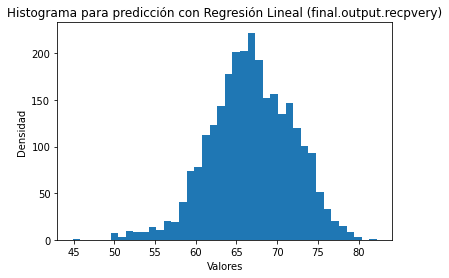

In [55]:
pred_linear_reg_np = np.array(pred_linear_reg)  
plt.hist(pred_linear_reg_np[:,1], bins=40)

plt.title('Histograma para predicción con Regresión Lineal (final.output.recpvery)')
plt.xlabel('Valores')
plt.ylabel('Densidad')

In [56]:
cross_val_r2(model_linear_reg,  df_features, df_targets)

R² promedio: 0.4605449219087695


In [57]:
smape_rougher_recovery_lr = smape(target_valid['rougher.output.recovery'], pred_linear_reg[:,0])
smape_rougher_recovery_lr

4.066232491580999

In [58]:
smape_final_recovery_lr = smape(target_valid['final.output.recovery'], pred_linear_reg[:,1])
smape_final_recovery_lr

7.2226150314385595

In [59]:
smape_final_lr =  smape_final(smape_rougher_recovery_lr, smape_final_recovery_lr)
smape_final_lr

6.4335193964741695

**Entrenando con arbol de decisión de regresión**

In [60]:
def DecisionTreeMod(features_train, features_valid, target_train, target_valid):
    best_model = None
    best_result = 10000
    best_depth = 0
    
    for depth in range(1,10):
        model = DecisionTreeRegressor(random_state=54321, max_depth=depth) # entrena el modelo en el conjunto de entrenamiento
        model.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
        predictions_valid = model.predict(features_valid) # obtén las predicciones del modelo en el conjunto de validación
        result = mean_squared_error(target_valid, predictions_valid)**0.5# calcula la RECM en el conjunto de validación
        if result < best_result:
            best_model = model
            best_result = result
            best_depth = depth
    
    best_model.fit(features_train, target_train)
    
    predictions_valid = best_model.predict(features_valid)
    print(f"RECM del mejor modelo en el conjunto de validación (max_depth = {best_depth}): {best_result}")
    print(best_result)
    
    return predictions_valid, best_model

In [61]:
pred_decision_tree, model_decision_tree = DecisionTreeMod(features_train, features_valid, target_train, target_valid)
pred_decision_tree

RECM del mejor modelo en el conjunto de validación (max_depth = 8): 5.636096637222266
5.636096637222266


array([[79.68413505, 63.37547786],
       [82.74095955, 68.18644026],
       [89.05257213, 67.67555846],
       ...,
       [83.9727771 , 65.41878326],
       [89.40419634, 70.58132854],
       [90.79162753, 61.77161512]])

Text(0, 0.5, 'Densidad')

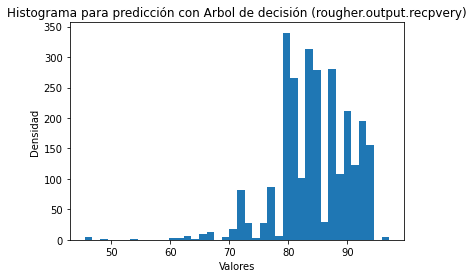

In [62]:
pred_decision_tree_np = np.array(pred_decision_tree)  
plt.hist(pred_decision_tree_np[:,0], bins=40)

plt.title('Histograma para predicción con Arbol de decisión (rougher.output.recpvery)')
plt.xlabel('Valores')
plt.ylabel('Densidad')

Text(0, 0.5, 'Densidad')

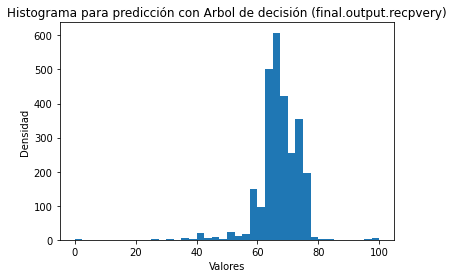

In [63]:
plt.hist(pred_decision_tree_np[:,1], bins=40)

plt.title('Histograma para predicción con Arbol de decisión (final.output.recpvery)')
plt.xlabel('Valores')
plt.ylabel('Densidad')

In [64]:
cross_val_r2(model_decision_tree,  df_features, df_targets)

R² promedio: 0.45907201790593966


In [65]:
smape_rougher_recovery_dt = smape(target_valid['rougher.output.recovery'], pred_decision_tree[:,0])
smape_rougher_recovery_dt

3.682461737419902

In [66]:
smape_final_recovery_dt= smape(target_valid['final.output.recovery'], pred_decision_tree[:,1])
smape_final_recovery_dt

/tmp/ipykernel_88/2411962030.py:10: RuntimeWarning: invalid value encountered in true_divide
  return 100 * np.nansum(abs_diff / ((abs_y + abs_y_pred) / 2)) /len(y) ##Se puede sumar un 0.0001 para evitar division 0


6.650444840874348

In [67]:
smape_final_dt =  smape_final(smape_rougher_recovery_dt, smape_final_recovery_dt)
smape_final_dt

5.908449065010736

**Entrenando con bosque aleaotrio de regresión**

In [68]:
def RandomForestMod(features_train, features_valid, target_train, target_valid):
    best_model = None
    best_result = 10000
    best_est = 0
    best_depth = 0
    
    for est in range(1, 100, 20):
        for depth in range (1, 10):
            model = RandomForestRegressor(random_state=54321, n_estimators=est, max_depth=depth) # inicializa el constructor de modelos con los parámetros random_state=12345 y n_estimators=est
            model.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
            predictions_valid = model.predict(features_valid) # obtén las predicciones del modelo en el conjunto de validación
            result = mean_squared_error(target_valid, predictions_valid)**0.5 # calcula la RECM en el conjunto de validación
            if result < best_result:
                best_model = model
                best_result = result
                best_est = est
                best_depth = depth

    print("RECM del mejor modelo en el conjunto de validación", best_result, "n_estimators:", best_est, "best_depth:", depth)
    best_model.fit(features_train, target_train)
    predictions_valid = best_model.predict(features_valid)
    
    return predictions_valid, best_model

In [69]:
### Esto se demora en compilar
pred_random_forest, model_random_forest = RandomForestMod(features_train, features_valid, target_train, target_valid)
pred_random_forest

RECM del mejor modelo en el conjunto de validación 4.989090519536437 n_estimators: 81 best_depth: 9


array([[78.89133997, 62.6736279 ],
       [79.61847047, 68.40571002],
       [86.20213385, 64.96037812],
       ...,
       [84.18762383, 65.59488404],
       [89.60343512, 72.80290403],
       [88.38948607, 68.50518144]])

Text(0, 0.5, 'Densidad')

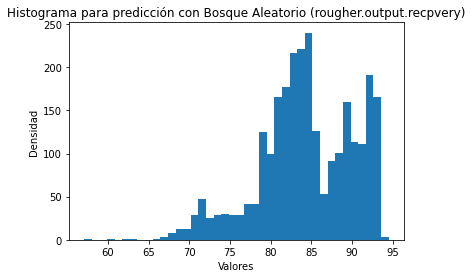

In [70]:
pred_random_forest_np = np.array(pred_random_forest)
plt.hist(pred_random_forest_np[:,0], bins=40)
plt.title('Histograma para predicción con Bosque Aleatorio (rougher.output.recpvery)')
plt.xlabel('Valores')
plt.ylabel('Densidad')

Text(0, 0.5, 'Densidad')

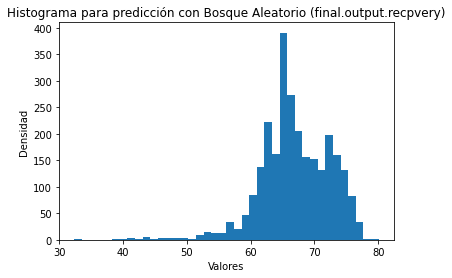

In [71]:
plt.hist(pred_random_forest_np[:,1], bins=40)
plt.title('Histograma para predicción con Bosque Aleatorio (final.output.recpvery)')
plt.xlabel('Valores')
plt.ylabel('Densidad')

In [72]:
## Esto se demora en compilar
cross_val_r2(model_random_forest, df_features, df_targets)

R² promedio: 0.6022760047753832


In [73]:
smape_rougher_recovery_rf = smape(target_valid['rougher.output.recovery'], pred_random_forest[:,0])
smape_rougher_recovery_rf

3.1507188113868954

In [74]:
smape_final_recovery_rf= smape(target_valid['final.output.recovery'], pred_random_forest[:,1])
smape_final_recovery_rf

6.0466171787389955

In [75]:
smape_final_rf =  smape_final(smape_rougher_recovery_rf, smape_final_recovery_rf)
smape_final_rf

5.322642586900971

**Observaciones de los modelos entrenados**

- Se ha analizado los resiltados de RECM de cada uno de los modelos con los que se entrenaron los datos y se observa que el modelo que mejor resultado entrega es RandomForestRegressor con una cantidad de estimadores de 81 y una profundidad de 9. Aumentando la cantidad de arboles y de profundidad se observó que no existía una mejora considerable pero si se aumentaba el tiempo de procesamiento en gran medida.
- Los tres modelos el que peores resultados entrega es el de regresión lineal, como era de esperarse, sin embargo la diferencia de resultados entre los tres modelos no es tan grande, por lo que si el tiempo de procesamiento es muy grande utilizando el modelo de Random Forest se puede cambiar a cualquiera de los otros dos modelos sin problemas
- Realizando los calculos de sMAPE para las dos características solicitadas y el sMAPE final observamos que no hay mucha diferencia entre los tres modelos, siendo que el modelo que mejores resultados genera es el de Random Forest.



En el siguiente cuadro se resumirá los datos encontrados:

| Modelo | RECM | R2 | sMAPE Rougher recovery | sMAPE final recovery| sMAPE final|
|-----------|-----------|-----------|-----------|-----------|------------|
| Regresión lineal| 5.867| 0.4605| 4.066 | 7.222 | 6.433
| Arbol de decisión|5.636| 0.459 | 3.682 | 6.650 | 5.908
| Bosque aleatorio| 4.98| 0.602| 3.150 | 6.046 | 5.322

## Probando el modelo con la base de datos "test":

In [76]:
gold_recovery_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,df
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,Test
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,Test
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,Test
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,Test
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909,Test
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761,Test
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882,Test
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284,Test


In [77]:
pred_test_lr = model_linear_reg.predict(gold_recovery_test.drop(columns=["df", "date"]))
pred_test_lr                                        

array([[89.24570845, 72.33845082],
       [89.8903855 , 73.23567928],
       [90.0981017 , 73.2185734 ],
       ...,
       [90.6533267 , 72.08301429],
       [91.80442585, 74.52456937],
       [90.48767589, 73.41843329]])

In [78]:
pred_test_dt = model_decision_tree.predict(gold_recovery_test.drop(columns=["df", "date"]))
pred_test_dt

array([[92.60478086, 71.68156582],
       [92.60478086, 71.68156582],
       [92.60478086, 71.68156582],
       ...,
       [93.15480677, 71.32367132],
       [93.15480677, 71.32367132],
       [93.15480677, 71.32367132]])

In [79]:
pred_test_rf = model_random_forest.predict(gold_recovery_test.drop(columns=["df", "date"]))
pred_test_rf

array([[88.90690167, 70.92627089],
       [88.35602089, 70.3418828 ],
       [87.77281014, 70.20592655],
       ...,
       [92.06761068, 72.09097682],
       [92.07276983, 72.10321137],
       [92.05006348, 72.08747215]])

Ahora vamos a comparar con los datos de la base de datos full donde si se encuentra el valor de las características que se quieren predecir. Para esto vamos a hacer un join en la base de datos de pureba para completar las caracteristicas que faltan

In [80]:
df_test_completo = gold_recovery_test.merge(gold_recovery_full, on = "date", how='left')
df_test_completo

,date,primary_cleaner.input.sulfate_x,primary_cleaner.input.depressant_x,primary_cleaner.input.feed_size_x,primary_cleaner.input.xanthate_x,primary_cleaner.state.floatbank8_a_air_x,primary_cleaner.state.floatbank8_a_level_x,primary_cleaner.state.floatbank8_b_air_x,primary_cleaner.state.floatbank8_b_level_x,primary_cleaner.state.floatbank8_c_air_x,...,secondary_cleaner.state.floatbank4_a_air_y,secondary_cleaner.state.floatbank4_a_level_y,secondary_cleaner.state.floatbank4_b_air_y,secondary_cleaner.state.floatbank4_b_level_y,secondary_cleaner.state.floatbank5_a_air_y,secondary_cleaner.state.floatbank5_a_level_y,secondary_cleaner.state.floatbank5_b_air_y,secondary_cleaner.state.floatbank5_b_level_y,secondary_cleaner.state.floatbank6_a_air_y,secondary_cleaner.state.floatbank6_a_level_y
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5378,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5379,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5380,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5381,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [81]:
df_test_completo[targets]

,rougher.output.recovery,final.output.recovery
0,89.993421,70.273583
1,88.089657,68.910432
2,88.412756,68.143213
3,87.360133,67.776393
4,83.236367,61.467078
...,...,...
5378,95.172585,68.919891
5379,94.575036,68.440582
5380,93.018138,67.092759
5381,92.599042,68.061186


In [82]:
### Esta sección de codigo se hace debido a que hay nan en la base de datos test y genera un error a la funcion mse
ror_test=df_test_completo['rougher.output.recovery'].values
ror_predicted =  pred_test_rf[:,0]

for_test=df_test_completo['final.output.recovery'].values
for_predicted =  pred_test_rf[:,1]

mask1 = ~np.isnan(ror_test) & ~np.isnan(ror_predicted)
mask2 = ~np.isnan(for_test) & ~np.isnan(for_predicted)

ror_test_sn = ror_test[mask1]
ror_predicted_sn = ror_predicted[mask1]

for_test_sn = for_test[mask2]
for_predicted_sn = for_predicted[mask2]

RECM_ror = mean_squared_error(ror_test_sn, ror_predicted_sn )**0.5
RECM_for = mean_squared_error(for_test_sn, for_predicted_sn )**0.5


print(f"El RECM de la predicción para rougher.output.recovery es: {RECM_ror}")

print(f"El RECM de la predicción para final.output.recovery es: {RECM_for}")


El RECM de la predicción para rougher.output.recovery es: 12.690059639440348
El RECM de la predicción para final.output.recovery es: 8.245038374962075


## Conclusiones

Despues de los resultados obtenidos se ha llegado a la siguientes conclusiones:
- Realizando el preprocesamiento de datos se observó que que la cantidad recopilada de información es muy extensa, lo cual ayuda a que los modelos de predicción sean más exactos, sin embargo es necesario que la información tenga la menor cantidad de datos ausentes posibles debido a que en este tipo de proyectos no es posible rellenar datos con suposiciones dado que puede alterar los resultados.
- Debido a que la base de datos de "test" no tenía todas las columnas que se tenía en la base de datos de entrenamiento, la cantidad de características que se puede poner en el modelo de entrenamiento se ve reducida. Se probó fuera de este proyecto que utilizando todas las columnas se logra predicciones con una menor cantidad de errores.
- Se validó que los datos entregados con respecto a los calculos de recuperación estuvieran correctos
- Para la sección del cambio de concentración de metales dependiendo de la etapa se observó como sube la concentración de oro con cada etapa de purificación, la concentración de plata se reduce y con respecto al plomo, se observa como solo el primer proceso de limpieza logra que la concentración suba, los demas procesos de limpieza no afectan en la concentración de plomo.
- En la sección donde se realiza comparación de las distribuciones de tamaño de las partícuales de la alimentación para el conjunto de entrenamiento y de prueba se validó que no existían variaciones significantes.
- Para la sección del modelo de predicción se observó que el modelo de Bosque Aleatorio de Regresión tuvo los mejores resultados con respecto al RECM y al sMAPE final, lo cual lo convierte en el mejor modelo, sin embargo tiene una carga computacional alta, y la diferencia en resutados con los demas modelos no es tan amplia, por lo que podría optarse por cualquiera de los dos probados para este proyecto.
- Se probaron los modelos para la base de datos de pureba y se observó que el RECM era bastante similar a lo obtenido con los datos de entrenamiento, por lo que se puede concluir que el modelo funciona correctamente.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente todo el proceso de entrenamiento y validación del modelo, en general en todo el desarrollo haz ejecutado muy buenas prácticas, esto no es solo una muestra de habilidades técnicas en ciencia de datos, si no también de desarrollo. Además de esto en relación a la parte final, no solo implementaste el sMAPE y el sMAPE final, sino una metrica de R2 también, además de visualizarlo de forma clara y precisa en un Dataframe, donde se permite ver claramente cada resultado sin ningún problema. También haces un análisis acerca de tiempo computacional vs resultados en el cuál, el tiempo de procesamiento del bosque aleatorio es muy alto para variaciones tan pequeñas, esta conclusión es muy valiosa. Dar una discusión acerca de los valores de la métrica sMAPE sería muy apreciado debiod a que es una métrica incorporada, aunque en general todo el proceso final y la discusión es muy buena, demostrando muchas características de científicos de datos en ejercicio.
</div>